In [3]:
from pingouin import ttest
import pandas as pd

df =  pd.read_csv('seoul_real_estate.csv',parse_dates = ['DEAL_YMD'])
df['month'] = df['DEAL_YMD'].dt.month
apt_df = df[(df['HOUSE_TYPE'] == '아파트') & (df['month'].isin([2,3]))]

dec_df = apt_df[apt_df['month'] == 2]
nov_df = apt_df[apt_df['month'] == 3]

print('2월 아파트 평균 가격(만원) : {}'.format(dec_df['OBJ_AMT'].mean()))
print('3월 아파트 평균 가격(만원) : {}'.format(nov_df['OBJ_AMT'].mean()))

ttest(dec_df['OBJ_AMT'],nov_df['OBJ_AMT'], paired=False)

2월 아파트 평균 가격(만원) : 104537.82953020134
3월 아파트 평균 가격(만원) : 86951.29898989899


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.868286,1038.958757,two-sided,5.915944e-09,"[11705.91, 23467.15]",0.22835,1.299e+06,0.995797


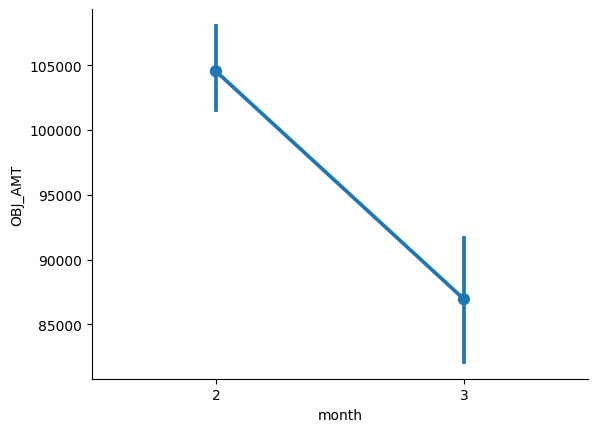

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.pointplot(x = 'month', y='OBJ_AMT', data=apt_df)
sns.despine()

plt.show()

In [6]:
df =  pd.read_csv('seoul_real_estate.csv',parse_dates = ['DEAL_YMD'])
sgg_df = df[df['SGG_NM'] == '구로구']

mean_size = sgg_df.groupby('DEAL_YMD')['OBJ_AMT'].agg(['mean','size']).reset_index()
mean_size

,DEAL_YMD,mean,size
0,2023-11-02,40337.500000,8
1,2023-11-03,45704.166667,12
2,2023-11-04,44820.833333,12
3,2023-11-05,40900.000000,2
4,2023-11-06,46228.571429,7
...,...,...,...
123,2024-03-11,53000.000000,3
124,2024-03-12,15000.000000,1
125,2024-03-13,45500.000000,1
126,2024-03-15,26400.000000,2
